# Dictionary Learning

In [1]:
import os
import numpy as np
import torch
from torch import nn
from torchvision import transforms
from torchvision.ops.boxes import box_iou
import matplotlib.pyplot as plt
from PIL import Image
import cv2
PENNFUDAN_LABEL_NAMES = ['__background__', 'person']

In [2]:
D = np.load('PennFudanPed/Dict/train_dict.npy').reshape(301, -1)
y = np.load('PennFudanPed/Dict/test_dict.npy').reshape(122, -1)
D.shape, y.shape

((301, 2048), (122, 2048))

## Sklearn

In [3]:
from sklearn.decomposition import DictionaryLearning

**This is very slow...**

In [5]:
dict_learner = DictionaryLearning(
    n_components=256, transform_algorithm='lasso_lars', transform_alpha=0.1,
)
x = dict_learner.fit(D).transform(y)
x.shape

(122, 256)

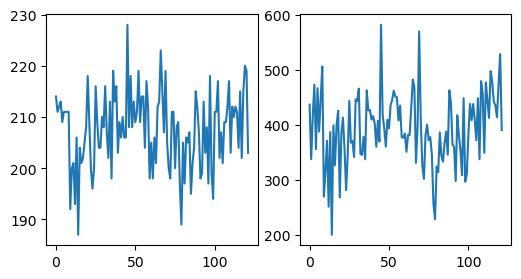

In [6]:
l0 = np.linalg.norm(x, ord=0, axis=1)
l1 = np.linalg.norm(x, ord=1, axis=1)
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].plot(l0)
ax[1].plot(l1)

In [7]:
def show_topk(y, D, x, k):
    ids = np.argsort(np.abs(x))[::-1][:5]
    fig, ax = plt.subplots(1, k+1, figsize=(3*k, 3))
    ax[0].imshow(y.reshape(64, 32))
    ax[0].axis('off')
    ax[0].set_title('L1 = {:.3f}\nL0 = {:.3f}'.format(np.linalg.norm(x, ord=1), np.linalg.norm(x, ord=0)))
    for i, ii in enumerate(ids):
        ax[i+1].imshow(D[ii].reshape(64, 32))
        ax[i+1].axis('off')
        ax[i+1].set_title('Coef = {:.3f}'.format(x[ii]))

In [8]:
ids = np.argsort(l1)[:5]
ids, l1[ids], l0[ids]

(array([14, 79, 12, 78, 19]),
 array([199.93460336, 228.12642275, 251.0576396 , 256.03476773,
        267.77517451]),
 array([187., 189., 193., 197., 208.]))

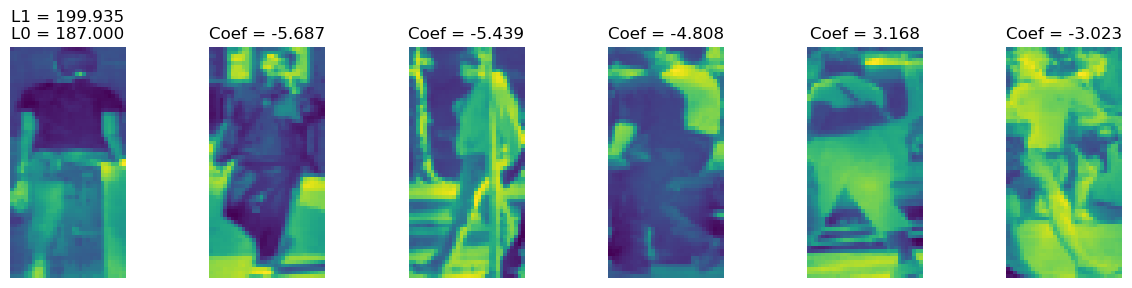

In [9]:
i = 14
show_topk(y[i], D, x[i], k=5)

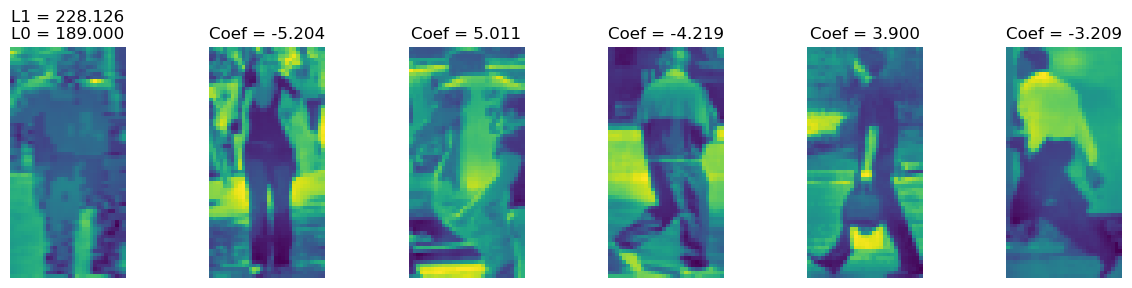

In [10]:
i = 79
show_topk(y[i], D, x[i], k=5)

In [11]:
ids = np.argsort(l1)[::-1][:5]
ids, l1[ids], l0[ids]

(array([ 45,  69, 120,   8, 114]),
 array([581.88161811, 569.93460269, 528.47971026, 505.89168863,
        497.45522146]),
 array([228., 219., 219., 211., 211.]))

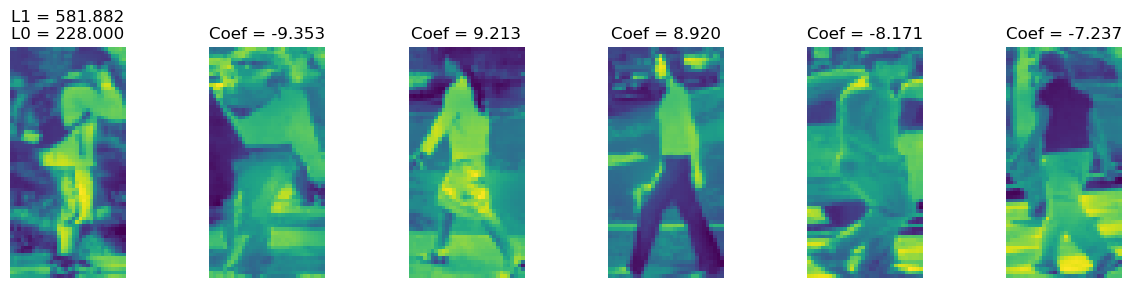

In [12]:
i = 45
show_topk(y[i], D, x[i], k=5)

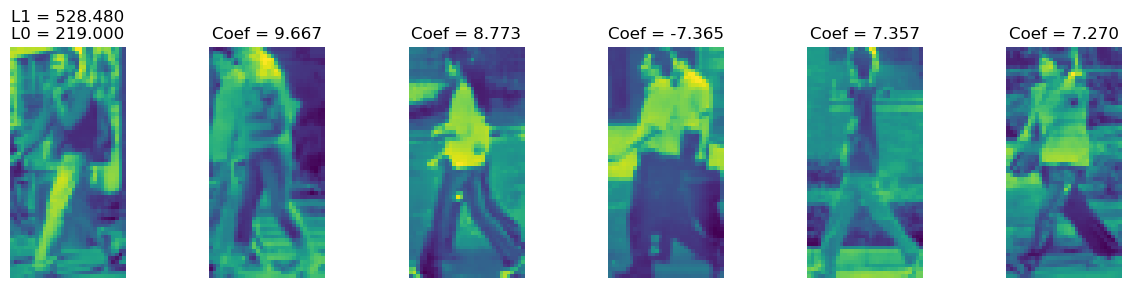

In [13]:
i = 120
show_topk(y[i], D, x[i], k=5)

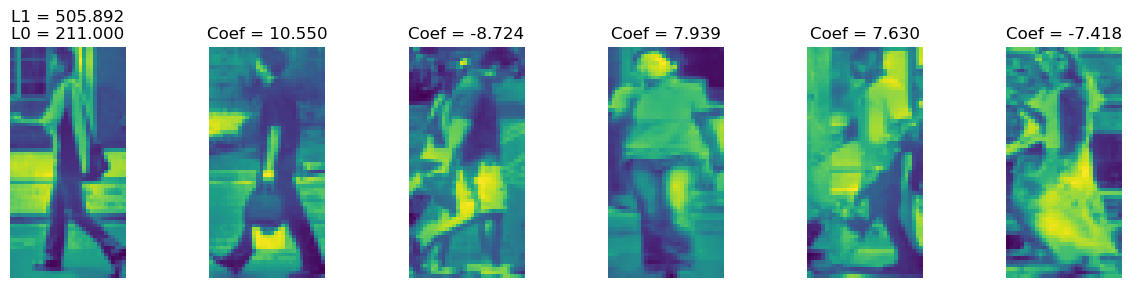

In [14]:
i = 8
show_topk(y[i], D, x[i], k=5)

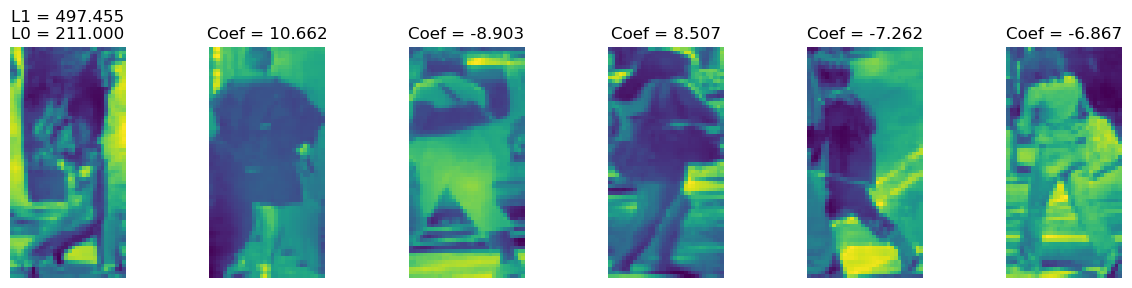

In [16]:
i = 114
show_topk(y[i], D, x[i], k=5)

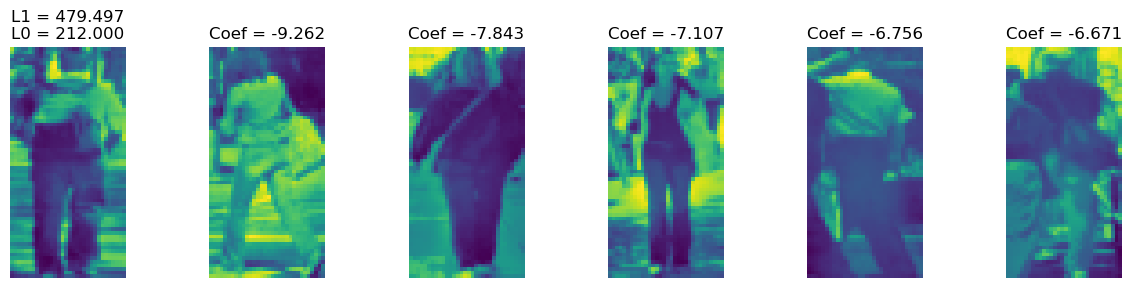

In [17]:
i = 108
show_topk(y[i], D, x[i], k=5)